
# Введение
Анализируются данные интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед нами данные до 2016 года. Нужно отработать принцип работы с данными. Неважно, бедем ли мы планировать продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».


**План работы**

**Шаг 1. Ознакомление с данными**

**Шаг 2. Подготовка данных**
- Заменить названия столбцов (привести к нижнему регистру);
- Преобразовать данные в нужные типы. Описать, в каких столбцах заменили тип данных и почему;
- Обработать пропуски при необходимости:
- Посчитать суммарные продажи во всех регионах и записать их в отдельный столбец.

**Шаг 3. Проведите исследовательский анализ данных**
- Посмотреть, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- Посмотреть, как менялись продажи по платформам. Выбрать платформы с наибольшими суммарными продажами и построить распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- Взять  данные за соответствующий актуальный период. Актуальный период определить самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
- Посмотреть какие платформы лидируют по продажам, растут или падают? Выбрать несколько потенциально прибыльных платформ.
- Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Описать результат.
- Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами. Сформулирвать выводы.
- Соотнести выводы с продажами игр на других платформах.
- Посмотреть на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

**Шаг 4. Составьте портрет пользователя каждого региона**

- Определите для пользователя каждого региона (NA, EU, JP):
    1. Самые популярные платформы (топ-5). Опишите различия в долях продаж.
    2. Самые популярные жанры (топ-5). Поясните разницу.
    3. Влияет ли рейтинг ESRB на продажи в отдельном регионе?
    
**Шаг 5. Проверить гипотезы**
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Пояснить:
- Как сформулировали нулевую и альтернативную гипотезы;
- Какой критерий применили для проверки гипотез и почему.

**Шаг 6. Напишите общий вывод**



# Ознакомление с данными

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import datetime
import math
import plotly.express as px
import plotly.graph_objs as go
import warnings
warnings.filterwarnings('ignore')
from scipy import stats as st
import numpy as np

In [2]:
def info(data):
# функция выводит информаци по загруженному датефрейму    

    print('--------------Обзор загруженных данных-----------')
    display(data.head(5))
    print()
    data.info()
    print()
    print()
    print('----------Размер датасета---')
    print(data.shape)
    print()
    print('----------Пропуски----------')
    for i in data.columns:
        if data[i].isna().sum()>0:
            print(f'Количество пропусков в столбце {i}:',data[i].isna().sum(),
                  ', что состовляет: {:.2%}'.format(data[i].isna().mean()))
    display(pd.DataFrame(round((data.isna().mean()*100),2)).style.background_gradient('coolwarm'))
            
            
            
    print()        
    print('----------Дубликаты----------')   
    print('Количество полных дубликатов:', data.duplicated().sum())
    print()

    print('----------Типы данных--------')
    list2={}
    for i in data.columns:
        key = data[i].dtypes
        list2.setdefault(key, [])
        list2[key].append(i)
    for i,k in list2.items():
        print(f'Тип данных {i}: {k}')       

In [3]:
game_sales=pd.read_csv('C:/Users/Hp/Desktop/project/дата сеты/games.csv')
info(game_sales)

--------------Обзор загруженных данных-----------


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


----------Размер датасета---
(16715, 11)

----------Пропуски----------
Количество пропусков в столбце Name: 2 , что состовляет: 0.01%
Количество пропусков в столбце Year_of_Release: 269 , что состовляет: 1.61%
Количество пропусков в столб

,0
Name,0.010000
Platform,0.000000
Year_of_Release,1.610000
Genre,0.010000
NA_sales,0.000000
EU_sales,0.000000
JP_sales,0.000000
Other_sales,0.000000
Critic_Score,51.320000
User_Score,40.090000



----------Дубликаты----------
Количество полных дубликатов: 0

----------Типы данных--------
Тип данных object: ['Name', 'Platform', 'Genre', 'User_Score', 'Rating']
Тип данных float64: ['Year_of_Release', 'NA_sales', 'EU_sales', 'JP_sales', 'Other_sales', 'Critic_Score']


# Подготовка данных для исследования

In [4]:
# приведем название столбцов к нижнему регистру
game_sales.columns=game_sales.columns.str.lower()
# удаляем проуски в столбцах, так как их количество не значиетльно
game_sales.dropna(subset=['name','year_of_release','genre'],inplace=True)

# запольняем пропуски, пропуски заменияем на маркеры
pd.DataFrame(round((game_sales.isna().mean()*100),2)).style.background_gradient('coolwarm')
game_sales.loc[game_sales['critic_score'].isna(), 'critic_score']=-1
game_sales.loc[game_sales['user_score'].isna(), 'user_score']=-1
game_sales.loc[game_sales['user_score']=='tbd', 'user_score']="1"
game_sales.loc[game_sales['rating'].isna(), 'rating']='неизвестен'

# меняем тип данных
game_sales[['year_of_release', 'critic_score']]=game_sales[['year_of_release', 'critic_score']].astype(int)
game_sales['user_score']=pd.to_numeric(game_sales['user_score'])

In [5]:
# добавляем столбец продажи по всем регионам
game_sales['sale_world']=game_sales['na_sales']+game_sales['eu_sales']+game_sales['jp_sales']
game_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  int32  
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
 11  sale_world       16444 non-null  float64
dtypes: float64(6), int32(2), object(4)
memory usage: 1.5+ MB


**Вывод**

Были  пропуски в следующих данных:

- Name 0,01%
- Year_of_Release 1,61%
- Genre 0,01
- Critic_Score 51,52%
- User_Score 40,09 %
- Rating 40,48 %

Первые три группы пропусков удалили, так как они составляли не существенныую долю в наших данных. В Critic_Score пропуск заменили на маркер -1, в user_score пропуски и tbd(рейтинг определяется), также заменили на маркер -1. В rating заменили на неизвестен. Такие замены провели по тому, что в данных случаях ввиду бльшой доли пропусков целесообразней  заменить на маркер, чем на среднюю или медиану, которые исказять рейтинги игр.

Поменяли тип данных на int: year_of_release, critic_score, на flot:user_score

Добавили столбец saleies_world(выручка по регионам)



# Проведение анилиза данных

-<a id="anal_calls"></a>
## Анализ данных за весь период(первичный взгляд)

In [26]:
game_sales.pivot_table(index='year_of_release',values='name', aggfunc='count')
px.line(game_sales.pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count').reset_index(), 
      x = 'year_of_release', 
      y = 'name',  
      title = 'Количество выпущенных игр по годам')


In [7]:
display(game_sales.pivot_table(index='platform',values='sale_world', aggfunc='sum').
        reset_index().sort_values(by='sale_world',ascending=False).
        head(10))


,platform,sale_world
16,PS2,1043.09
28,X360,876.36
26,Wii,813.47
17,PS3,796.75
4,DS,743.74
15,PS,686.89
6,GBA,305.27
18,PS4,265.79
19,PSP,248.77
5,GB,246.27


In [8]:
fig = px.bar(
    game_sales.pivot_table(index='platform',values='sale_world', aggfunc='sum').reset_index().sort_values(by='sale_world',ascending=True), 
    x="platform", 
    y="sale_world",
    title="Продажи по платформам за все время")
fig

In [9]:
px.line(game_sales.pivot_table(index = ['year_of_release', 'platform'], values = 'sale_world', aggfunc = 'sum').reset_index(), 
      x = 'year_of_release', 
      y = 'sale_world', 
      color = 'platform' , 
      title = 'Продажи игр по платформам в разрезе годов')


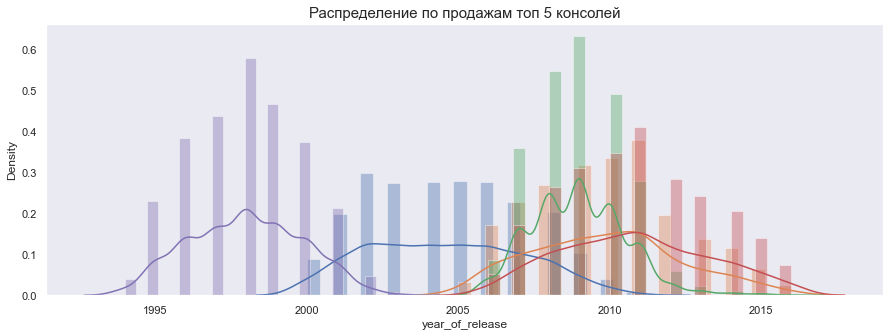

In [10]:
# распределение топ 5 консолей
list_top_platform_sales=['PS2','X360','Wii','PS3','PS']
plt.figure(figsize=(15,5))
for i in list_top_platform_sales:
    fd=sns.distplot(game_sales[game_sales['platform']==i]['year_of_release'],bins=25,kde=True)

fd.set_title('Распределение по продажам топ 5 консолей',
            fontsize=15)
plt.grid(False)
plt.show()

In [11]:
actual_ganes_period=game_sales.query('2013<=year_of_release<2016')

In [12]:
px.line(actual_ganes_period.pivot_table(index = ['year_of_release', 'platform'], values = 'sale_world', aggfunc = 'sum').reset_index(), 
      x = 'year_of_release', 
      y = 'sale_world', 
      color = 'platform' , 
      title = 'Продажи игр по платформам в разрезе 2013 -2015 годов')

 ### Вывод
 Выбрали период для анализа 2013-2015 . Выбор периода был основан на том, что продолжительность жизни топовых консолей 8-10 лет. А большинство игр выпускается как раз под них. На период 2013-2015 приходит упадок старых лидеров, и появление новых. Что примечательно упадок и появление новых очень взаимозависимы, так зачастую лидирующие позиции занимают одни и теже фирмы которые выпускали разные моделей консолей. Если проследить по годам то в последнее время в лидерах были Sony(PS,PS2,PS3,PS4) и Мicrrosoft(Xbo360, Xone). Они даже создаются практически всегда в один период. После выпуска новой консоли, производитель плавно прекращаются поддержуку старых моделей и выпускают новые игры которые не пойдут на прошлой версии платфомы.
Включать данные 2016 не стали, так как было сказано, что данные не полные, по текущим данным с 2016 года спад у платофрм, но возможно с полными данными, они еще не достигли пика.



## Анализ данных за  период 2013-2015 года

### Продажи по платформам(boxplot-график)


Text(0.5, 0.98, 'Продажи по плтатформам за 2013-2015 года(boxplot)')

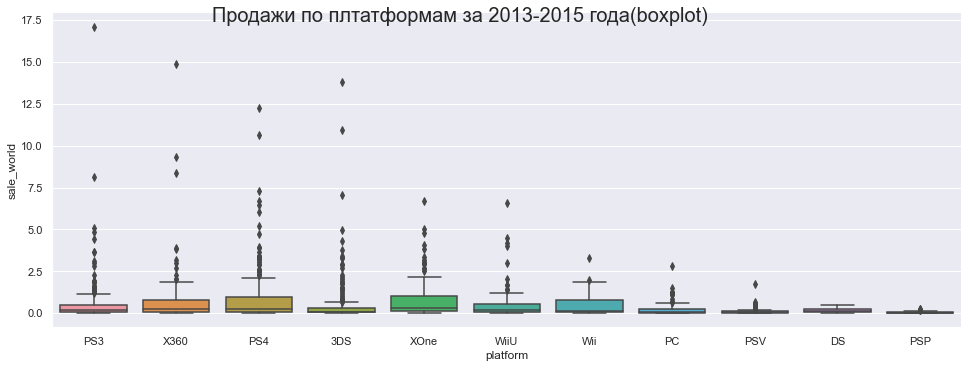

In [28]:
kl=sns.catplot(x='platform',
            y='sale_world',
            kind='box',
            data=actual_ganes_period
            )
kl.fig.set_size_inches(15,5)
kl.fig.suptitle('Продажи по плтатформам за 2013-2015 года(boxplot)',fontsize = 20)

In [14]:
list_platform_2013_2015=list(actual_ganes_period['platform'].unique())
list_platform_2013_2015

for i in list_platform_2013_2015:
    display(actual_ganes_period.loc[actual_ganes_period['platform']==i,'sale_world'].describe())

count    307.000000
mean       0.493257
std        1.260613
min        0.010000
25%        0.050000
50%        0.170000
75%        0.490000
max       17.090000
Name: sale_world, dtype: float64

count    173.000000
mean       0.712659
std        1.565045
min        0.010000
25%        0.080000
50%        0.260000
75%        0.810000
max       14.860000
Name: sale_world, dtype: float64

count    228.00000
mean       0.90693
std        1.59854
min        0.01000
25%        0.08750
50%        0.26500
75%        0.94250
max       12.25000
Name: sale_world, dtype: float64

count    257.000000
mean       0.476537
std        1.355973
min        0.010000
25%        0.040000
50%        0.090000
75%        0.280000
max       13.820000
Name: sale_world, dtype: float64

count    160.000000
mean       0.757125
std        1.074818
min        0.010000
25%        0.120000
50%        0.320000
75%        1.040000
max        6.710000
Name: sale_world, dtype: float64

count    101.000000
mean       0.551386
std        1.020578
min        0.010000
25%        0.060000
50%        0.190000
75%        0.550000
max        6.580000
Name: sale_world, dtype: float64

count    22.000000
mean      0.562273
std       0.850635
min       0.010000
25%       0.042500
50%       0.155000
75%       0.782500
max       3.270000
Name: sale_world, dtype: float64

count    135.000000
mean       0.233926
std        0.366466
min        0.010000
25%        0.030000
50%        0.090000
75%        0.265000
max        2.820000
Name: sale_world, dtype: float64

count    273.000000
mean       0.093883
std        0.146622
min        0.010000
25%        0.020000
50%        0.050000
75%        0.100000
max        1.720000
Name: sale_world, dtype: float64

count    8.000000
mean     0.177500
std      0.158182
min      0.030000
25%      0.060000
50%      0.140000
75%      0.230000
max      0.470000
Name: sale_world, dtype: float64

count    67.000000
mean      0.051642
std       0.058558
min       0.010000
25%       0.015000
50%       0.020000
75%       0.070000
max       0.240000
Name: sale_world, dtype: float64

**Вывод**

Из полученных данных из графика и метода describe видим, что по всем платформам ящик смещен вправо.Мидиана весьма невысокая, что говорит, о том, что в игрвой индустрии много дешевых игр пользующихся спросом. Но основную долю выручку приносят дорогие игры. Больше всего выбросов у топ платформ, но это и неудивительно, они создают экслюзивные игры,которые пользуются спросом и стоят очень дорого. Политика некоторых производителей топовых консолей заключается в продаже консолей в 0 или убыток, но затем выход в плюс засчет продажи игр.

## Таблица с данными по платформам(2013-2015 года)

In [15]:
(
actual_ganes_period.pivot_table(index='platform',values='sale_world',aggfunc=('count','sum','mean','median','std','var'))
.sort_values(by = 'sum', ascending=False)
)

,count,mean,median,std,sum,var
platform,,,,,,
PS4,228,0.906930,0.265,1.598540,206.78,2.555332
PS3,307,0.493257,0.170,1.260613,151.43,1.589145
X360,173,0.712659,0.260,1.565045,123.29,2.449367
3DS,257,0.476537,0.090,1.355973,122.47,1.838662
XOne,160,0.757125,0.320,1.074818,121.14,1.155233
WiiU,101,0.551386,0.190,1.020578,55.69,1.041580
PC,135,0.233926,0.090,0.366466,31.58,0.134297
PSV,273,0.093883,0.050,0.146622,25.63,0.021498
Wii,22,0.562273,0.155,0.850635,12.37,0.723580


<a id="valis"></a>
## Зависимость продаж игр от оценок

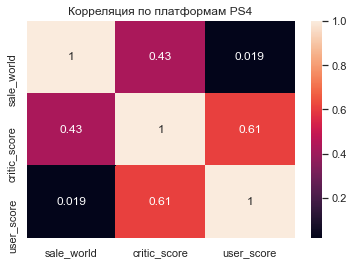

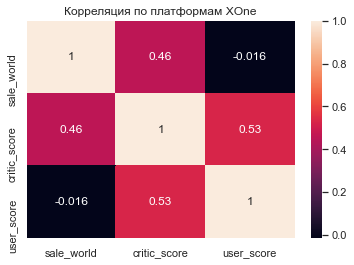

In [31]:
list_corr=['PS4','XOne']
for i in list_corr:
    f=actual_ganes_period[(actual_ganes_period['platform']==i)&
                          (actual_ganes_period['critic_score']!=-1)&
                          (actual_ganes_period['user_score']!=-1)][['sale_world','critic_score','user_score']]
    plt.show()
    fg=sns.heatmap(f.corr(),annot=True)
    fg.set_title('Корреляция по платформам '+i)

**Вывод**

Расчет корреляции показал среднюю зависимость от оценок критиков. Были выбраны для рассморения зависимости две топовые платформа Ps4 и Xone. Коррелиции получились примерно одиниковые 0,43 и 0,46. Что говорит о схожем влияние рейтингов на продажи игр на топовых консолях.ъ

Зависимость от оценок пользователей оказлась не существенной на обоих платформах

<a id="genre"></a>
## Продажи по жанрам

In [17]:
func=['sum','mean']
for i in func:
    fig = px.bar(
        actual_ganes_period.pivot_table(index='genre',values='sale_world', aggfunc=(i)).reset_index().sort_values(by='sale_world',ascending=True), 
        x="genre", 
        y="sale_world",
        title="Продажи по жанрам 2013-2015 года "+i)
    fig.show()


Из графика видно что самыми популярными жанрами являются экшен, спорт, шутер, ролевые, гоноки.

Непопулярными жанрами являются пазл, симуляция, стратегия.

Это говорит о том что пользователи склонны к  легким развлекательным жанром, и мало кто любит жанры с мыслительной деятельностью.

# Портрет пользователя

## Самые популярные платформы (топ-5) по регионам.

In [18]:
list_region = actual_ganes_period[['na_sales', 'eu_sales', 'jp_sales']]

def choose(df,columns,grup):
    display(
        (df.pivot_table(index=grup,values=columns, aggfunc='sum').
            reset_index().
            sort_values(by=columns, ascending=False).head(5))
           )
for columns in  list_region:
    choose(actual_ganes_period,columns,'platform')

,platform,na_sales
4,PS4,87.25
9,X360,80.97
10,XOne,78.85
3,PS3,62.83
0,3DS,34.06


,platform,eu_sales
4,PS4,109.31
3,PS3,66.55
10,XOne,41.96
9,X360,41.81
0,3DS,28.63


,platform,jp_sales
0,3DS,59.78
3,PS3,22.05
6,PSV,15.03
4,PS4,10.22
8,WiiU,10.21


### Вывод
Из данных видно, что самыми попурными в мире являются консоли от производителей Soni и Microsoft. Но региональная специфика влияет на распределение в топ рейтинге. Это связано, что родиной платформ от Microsof является США, а родиной Soni: Япония.
Возможно пользователи предпочитают свои национальные продукты, а возможно снижается стоимость консолей, за счет снижения транспортных расходов и пошлин.

**Северо-американский рынок**

Лидеры по продажам платворфмы от Microsoft:XOne (45.75), X360 (45,03), в лидеры вырвалась консоль нового поколения XOne. Но и продажи Soni в Америке тоже достаточно вычокие.

**Европейский рынок**

Лидеры по продажам PS4(43.69) и XOne (24.50), видно что европейцы больше предпочетают бренд от Soni, топовая модель PS продается в два рза лучше, чем консоль конкурента.

**Японский рынок**

Японии не одна из топ консолей не зашла в топ 2, в топ 2 попали PS3(17.82), 3DS(15.17).Что примечательно, продажи игр по платформам в Японии очень низкие, хотя японцы одни из самых играющих людей в мире. Это возможнно связно с тем:
- есть более популярные ресурсы для продажи игр,
- в Японии очень сильно развита игровая индустрия,предпочтения яопнцев очень разнообразны и не ограничиваются определенными платформами.

## Самые популярные жанры (топ-5) по регионам.

In [19]:
for columns in  list_region:
    choose(actual_ganes_period,columns,'genre')

,genre,na_sales
0,Action,116.76
8,Shooter,93.50
10,Sports,57.73
7,Role-Playing,40.51
3,Misc,26.73


,genre,eu_sales
0,Action,107.45
8,Shooter,71.96
10,Sports,48.51
7,Role-Playing,32.69
3,Misc,19.38


,genre,jp_sales
7,Role-Playing,44.43
0,Action,33.42
3,Misc,8.16
2,Fighting,6.90
8,Shooter,5.55


### Вывод
Беспорным фаворитом по продажам в независимости от рынка, является жанр игр экшен. Если раньше жанр экшен подразумевал актиные игры на реакцию, то сейчас жанр экшен включил в себя элементы разных игр. Многие игры  имеют интересный сюжет, включают элементы стрельбы, гонок, файтинга  и т.д.), тоесть обладают многими парамертрами, недающим игрокам заскучать.

В Северной америке, 2-3 позицию заняли спорт и шутеры. В Европе теже жанры заняли 2-3 место, но поменялись местами.
Видно, что народ в Северной Америке и Европе любит активные игры. И это не удивительно, это страны с большим количеством болельщиков в различных видах спорта. Жанр шутер возможно помогает снять напряжение.

В Японии же лиди очень много работают, и зачастую не имеют реальных друзей и второй половины, поэтому ищут общения в ролевых играх.


## Влияние  рейтинга ESRB на продажи в отдельном регионе.

In [20]:
for columns in  list_region:
    choose(actual_ganes_period,columns,'rating')


,rating,na_sales
2,M,149.54
4,неизвестен,80.89
0,E,71.08
1,E10+,50.43
3,T,40.84


,rating,eu_sales
2,M,128.78
4,неизвестен,71.44
0,E,69.75
1,E10+,38.88
3,T,32.16


,rating,jp_sales
4,неизвестен,70.73
3,T,18.32
0,E,14.07
2,M,12.91
1,E10+,5.44


### Вывод 

Из данных видно что в Северной Америке и Европе больше продаются игры с рейтингом М и E10+

(M» («Mature») — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории.

E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать немного больше мультипликационного или мягкого насилия, или несколько откровенные сцены или минимальное количество крови.


В Японии, если не учитывать продажи по маркеру, большой популярностью пользуются игры Т.

«T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет и старше. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики

<a id="gipoteza"></a>
## Выдвижение гипотез

### Проверка гипотезы средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Применяем критерий Стьюдента
Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, примените метод (scipy.stats.ttest_ind).

Выдвигаем нулевую гипотезу(H0).Нулевая гипотеза формируется как утверждение равенста.

`H0: Cредние пользовательские рейтинги платформ Xbox One и PC одинаковые.`


Выдвигаем альтернативную гипоотезу(H1), котороя противополжна нулевой гипотезе, тоесть строится на отрицание равенства.

`H1: средние пользовательские рейтинги платформ Xbox One и PC одинаковые неравны.`

In [21]:

#дисперсии равны \ Н1 не равны(проверяем равенство дисперсий)

levene = st.levene(actual_ganes_period.query('platform=="XOne"')['user_score'], 
                   actual_ganes_period.query('platform=="PC"')['user_score'])
alpha = 0.05
print('p-значение для теста Левене:', levene.pvalue)
if levene.pvalue < alpha:
    print('Гипотеза о равенстве дисперсий не нашла подтверждения')
else:
    print('Отвергнуть гипотезу о равенстве дисперсий не удалось')

p-значение для теста Левене: 0.39878784886622
Отвергнуть гипотезу о равенстве дисперсий не удалось


In [22]:
alpha = 0.05
results = st.ttest_ind(
    actual_ganes_period.query('platform=="XOne"')['user_score'], 
    actual_ganes_period.query('platform=="PC"')['user_score'],
    equal_var = True)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.2014801336319764
Не получилось отвергнуть нулевую гипотезу


### Средние пользовательские рейтинги жанров Action и Sports разные.

Применяем критерий Стьюдента
Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, примените метод (scipy.stats.ttest_ind).

Выдвигаем нулевую гипотезу(H0).Нулевая гипотеза формируется как утверждение равенста.

`H0: Средние пользовательские рейтинги жанров Action и Sports разные одинаковые.`


Выдвигаем альтернативную гипоотезу(H1), котороя противополжна нулевой гипотезе, тоесть строится на отрицание равенства.

`H1: Средние пользовательские рейтинги жанров Action и Sports разные.`

In [23]:
#дисперсии равны \ Н1 не равны(проверяем равенство дисперсий)

levene = st.levene(actual_ganes_period.query('genre=="Action"')['user_score'], 
                   actual_ganes_period.query('genre=="Sports"')['user_score'])
alpha = 0.05
print('p-значение для теста Левене:', levene.pvalue)
if levene.pvalue < alpha:
    print('Гипотеза о равенстве дисперсий не нашла подтверждения')
else:
    print('Отвергнуть гипотезу о равенстве дисперсий не удалось')

p-значение для теста Левене: 7.000683343429666e-32
Гипотеза о равенстве дисперсий не нашла подтверждения


In [24]:
alpha = 0.05
results = st.ttest_ind(
    actual_ganes_period.query('genre=="Action"')['user_score'], 
    actual_ganes_period.query('genre=="Sports"')['user_score'],
    equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.07975070956523746
Не получилось отвергнуть нулевую гипотезу


#### Вывод
H0: Cредние пользовательские рейтинги платформ Xbox One и PC одинаковые.(p-значение: 0.20394548493383355
Не получилось отвергнуть нулевую гипотезу)

H1: Средние пользовательские рейтинги жанров Action и Sports разные(p-значение: 0.0320355216140083
Отвергаем нулевую гипотезу)


# Общий вывод
Был проанализированы данные интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры.

На основании изученных данных можно сделать следущие вывод, что продолжительность жизни топовых консолей 8-10 лет.

Выбрали период для анализа 2013-2015 . Выбор периода был основан на том, что продолжительность жизни топовых консолей 8-10 лет. А большинство игр выпускается как раз под них. На период 2013-2015 приходит упадок старых лидеров, и появление новых. Что примечательно упадок и появление новых очень взаимозависимы, так зачастую лидирующие позиции занимают одни и теже фирмы которые выпускали разные моделей консолей. Если проследить по годам то в последнее время в лидерах были Sony(PS,PS2,PS3,PS4) и Мicrrosoft(Xbo360, Xone). Они даже создаются практически всегда в один период. После выпуска новой консоли, производитель плавно прекращаются поддержуку старых моделей и выпускают новые игры которые не пойдут на прошлой версии платфомы. Включать данные 2016 не стали, так как было сказано, что данные не полные, по текущим данным с 2016 года спад у платофрм, но возможно с полными данными, они еще не достигли пика.



Самыми попурными в мире являются консоли от производителей Soni и Microsoft. Но региональная специфика влияет на распределение в топ рейтинге. Это связано, что родиной платформ от Microsof является США, а родиной Soni: Япония.
Возможно пользователи предпочитают свои национальные продукты, а возможно снижается стоимость консолей, за счет снижения транспортных расходов и пошлин.

**Региональный рынок продаж**

**Северо-американский рынок**

Лидеры по продажам платворфмы от Microsoft:XOne (45.75), X360 (45,03), в лидеры вырвалась консоль нового поколения XOne. Но и продажи Soni в Америке тоже достаточно вычокие.

**Европейский рынок**

Лидеры по продажам PS4(43.69) и XOne (24.50), видно что европейцы больше предпочетают бренд от Soni, топовая модель PS продается в два рза лучше, чем консоль конкурента.

**Японский рынок**

Японии не одна из топ консолей не зашла в топ 2, в топ 2 попали PS3(17.82), 3DS(15.17).Что примечательно, продажи игр по платформам в Японии очень низкие, хотя японцы одни из самых играющих людей в мире. Это возможнно связно с тем:
- есть более популярные ресурсы для продажи игр,
- в Японии очень сильно развита игровая индустрия,предпочтения яопнцев очень разнообразны и не ограничиваются определенными платформами.


**Игровые жанры**

   Беспорным фаворитом по продажам в независимости от рынка, является жанр игр экшен. Если раньше жанр экшен подразумевал актиные игры на реакцию, то сейчас жанр экшен включил в себя элементы разных игр. Многие игры  имеют интересный сюжет, включают элементы стрельбы, гонок, файтинга  и т.д.), тоесть обладают многими парамертрами, недающим игрокам заскучать.

В Северной америке, 2-3 позицию заняли спорт и шутеры. В Европе теже жанры заняли 2-3 место, но поменялись местами.
Видно, что народ в Северной Америке и Европе любит активные игры. И это не удивительно, это страны с большим количеством болельщиков в различных видах спорта. Жанр шутер возможно помогает снять напряжение.

В Японии же лиди очень много работают, и зачастую не имеют реальных друзей и второй половины, поэтому ищут общения в ролевых играх.

**Возрастной рейтинг**

Северной Америке и Европе больше продаются игры с рейтингом М и E10+

(M» («Mature») — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории.

E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать немного больше мультипликационного или мягкого насилия, или несколько откровенные сцены или минимальное количество крови.

В Японии, если не учитывать продажи по маркеру, большой популярностью пользуются игры Т.

«T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет и старше. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики

**Приняли гипотезы:**

H0: Cредние пользовательские рейтинги платформ Xbox One и PC одинаковые.

H1: Средние пользовательские рейтинги жанров Action и Sports разные.